# Introduction to Numpy

# Numerical operations on arrays

### Section contents

* Elementwise operations
* Basic reductions
* Broadcasting
* Array shape manipulation
* Sorting data
* Summary


## Elementwise operations


### Basic operations


With scalars:

In [4]:
import numpy as np
a = np.array([1, 2, 3, 4])
a + 1

array([2, 3, 4, 5])

In [5]:
2**a

array([ 2,  4,  8, 16])

## Elementwise operations (2)

All arithmetic operates elementwise:

In [6]:
b = np.ones(4) + 1 # b = array([2.,2.,2.,2.])
a - b

array([-1.,  0.,  1.,  2.])

In [7]:
a * b

array([ 2.,  4.,  6.,  8.])

In [8]:
j = np.arange(5)
2**(j + 1) - j

array([ 2,  3,  6, 13, 28])

## Elementwise operations (3)
These operations are of course much faster than if you did them in pure
python:


In [9]:
a = np.arange(10000)
%timeit a + 1  

The slowest run took 29.22 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 5.1 µs per loop


In [10]:
l = range(10000)
%timeit [i+1 for i in l] 

1000 loops, best of 3: 643 µs per loop


## Elementwise operations (4)

**Warning**: *array multiplication is not matrix multiplication:*

In [11]:
c = np.ones((3, 3))
c * c                   # NOT matrix multiplication!

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

**Matrix multiplication:**


In [12]:
c.dot(c)

array([[ 3.,  3.,  3.],
       [ 3.,  3.,  3.],
       [ 3.,  3.,  3.]])

## Exercise: elementwise operations

* Try simple arithmetic elementwise operations.

* Time them against their pure python counterparts using `%timeit`.

* Try using `dot`.

* Generate:

    * `[2**0, 2**1, 2**2, 2**3, 2**4]`

    * `a_j = 2^(3*j) - j`


## Other elementwise operations
Comparisons:

In [13]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b

array([False,  True, False,  True], dtype=bool)

In [14]:
a > b

array([False, False,  True, False], dtype=bool)

## Other elementwise operations (2)
Logical operations:

In [15]:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)
np.logical_or(a, b)

array([ True,  True,  True, False], dtype=bool)

In [16]:
np.logical_and(a, b)

array([ True, False, False, False], dtype=bool)

## Other elementwise operations (3)
Transcendental functions:


In [17]:
a = np.linspace(1,10,10)
np.sin(a)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427,
       -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849, -0.54402111])

In [18]:
np.log(a)

array([ 0.        ,  0.69314718,  1.09861229,  1.38629436,  1.60943791,
        1.79175947,  1.94591015,  2.07944154,  2.19722458,  2.30258509])

In [19]:
np.exp(a)

array([  2.71828183e+00,   7.38905610e+00,   2.00855369e+01,
         5.45981500e+01,   1.48413159e+02,   4.03428793e+02,
         1.09663316e+03,   2.98095799e+03,   8.10308393e+03,
         2.20264658e+04])

## Elementwise operations: *shape mismatches*

**Broadcasting?** We'll return to that shortly


## Transposition:

In [20]:
a = np.triu(np.ones((3, 3)), 1)   # see help(np.triu)
a

array([[ 0.,  1.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  0.]])

In [21]:
a.T

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  1.,  0.]])

## Array-wise comparisons


In [22]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])
np.array_equal(a, b)

False

In [23]:
np.array_equal(a, c)

True

**Linear Algebra**: the sub-module ``numpy.linalg`` implements basic linear algebra,
such as solving linear systems, singular value decomposition, etc.

**Note**: However, ``numpy.linalg`` is not guaranteed to be compiled using efficient routines,
and thus we recommend the use of ``scipy.linalg``.


### Exercise other operations

* Look at the help for `np.allclose`. When might this be useful?

* Look at the help for `np.triu` and `np.tril`.

* Is the transpose a view or a copy? What implications does this have for
making a matrix symmetric?


## Basic reductions
Computing sums:

In [24]:
x = np.array([1, 2, 3, 4])
np.sum(x)

10

In [25]:
x.sum()

10

### Sum by rows and by columns

![A](images/reductions.png)

In [26]:
x = np.array([[1, 1], [2, 2]])

In [27]:
x.sum(axis=0)   # columns (first dimension)

array([3, 3])

In [28]:
x.sum(axis=1)   # rows (second dimension)

array([2, 4])

### Sum by rows and by columns (2)

An alternative syntax:

![A](images/reductions.png)

In [29]:
x[:, 0].sum(), x[:, 1].sum()

(3, 3)

In [30]:
x[0, :].sum(), x[1, :].sum()

(2, 4)

### Sum by rows and by columns (3)
Same idea in higher dimensions:

In [31]:
x = np.random.rand(2, 2, 2)
x.sum(axis=2)[0, 1]     

1.7027317547122744

In [32]:
x[0, 1, :].sum()     

1.7027317547122744

### Other reductions
--- works the same way (and take `axis=`)

Statistics:

In [33]:
x = np.array([1, 2, 3, 1])
y = np.array([[1, 2, 3], [5, 6, 1]])
x.mean()

1.75

In [34]:
np.median(x)

1.5

In [35]:
np.median(y, axis=-1) # last axis

array([ 2.,  5.])

In [36]:
x.std()          # full population standard dev.

0.82915619758884995

Extrema:


In [37]:
x = np.array([1, 3, 2])
x.min()

1

In [38]:
x.max()

3

In [39]:
x.argmin()  # index of minimum

0

In [40]:
x.argmax()  # index of maximum

1

Logical operations:


In [41]:
np.all([True, True, False])

False

In [42]:
np.any([True, True, False])

True

Can be used for array comparisons:


In [43]:
a = np.zeros((100, 100))
np.any(a != 0)

False

In [44]:
np.all(a == a)

True

## Array comparisons: another example

In [45]:
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])
((a <= b) & (b <= c)).all()

True

... and many more (best to learn as you go).


### Exercise: Reductions

* Given there is a `sum`, what other function might you expect to see?

* What is the difference between `sum` and `cumsum`?


### Worked Example: data statistics

Data in `data/populations.txt`
describes the populations of hares and lynxes (and carrots) in northern
Canada during 20 years.


You can view the data in an editor, or alternatively in IPython (both
shell and notebook):


In [46]:
! head -5 data/populations.txt

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200


First, load the data into a Numpy array:


In [47]:
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T  # trick: columns to variables

Then plot it


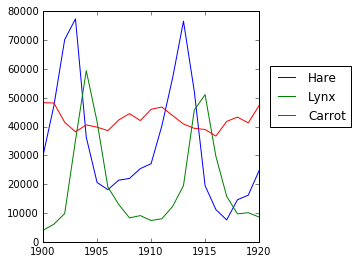

In [48]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 

The mean populations over time:


In [49]:
populations = data[:, 1:]
populations.mean(axis=0)

array([ 34080.95238095,  20166.66666667,  42400.        ])

The sample standard deviations:


In [50]:
populations.std(axis=0)

array([ 20897.90645809,  16254.59153691,   3322.50622558])

Which species has the highest population each year?:


In [51]:
np.argmax(populations, axis=1)

array([2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2])

## Broadcasting
* Basic operations are elementwise
* It works on arrays of the same size.
 E.g. broadcasting:
![B](images/numpy_broadcasting.png)


## Example of broadcasting: let's verify

In [52]:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [53]:
b = np.array([0, 1, 2])
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

We have already used broadcasting without being aware!


In [54]:
a = np.ones((4, 5))
a[0] = 2  # we assign an array of dimension 0 to an array of dimension 1
a

array([[ 2.,  2.,  2.,  2.,  2.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

A useful trick:


In [55]:
a = np.arange(0, 40, 10)
a.shape

(4,)

In [56]:
a = a[:, np.newaxis]  # adds a new axis -> 2D array
a.shape

(4, 1)

A useful trick:

In [57]:
a

array([[ 0],
       [10],
       [20],
       [30]])

In [58]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

**Tip**: broadcasting seems a bit magical, but it is actually quite natural to
use it when we want to solve a problem whose output data is an array
with more dimensions than input data.


## Worked Example: Broadcasting

Let's construct an array of distances (in miles) between cities of **Route
66**: 

Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo,
Santa Fe, Albuquerque, Flagstaff and Los Angeles.


In [59]:
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544,
       1913, 2448])
distance_array = np.abs(mileposts - mileposts[:, np.newaxis])
distance_array

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])

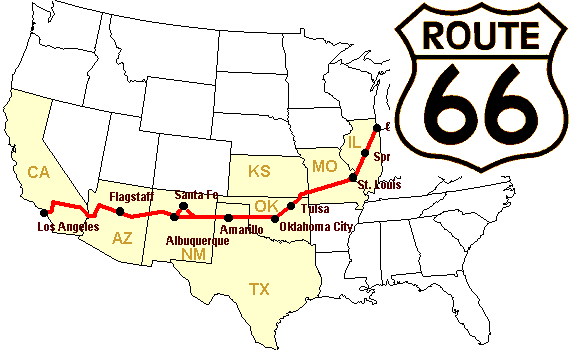

In [60]:
from IPython.display import Image
Image(filename='images/route66.png')

A lot of grid-based or network-based problems can also use broadcasting.
For instance, if we want to compute the distance from the origin of
points on a 10x10 grid, we can do


In [92]:
x, y = np.arange(5), np.arange(5)[:, np.newaxis]
distance = np.sqrt(x ** 2 + y ** 2)
print(distance)

[[ 0.          1.          2.          3.          4.        ]
 [ 1.          1.41421356  2.23606798  3.16227766  4.12310563]
 [ 2.          2.23606798  2.82842712  3.60555128  4.47213595]
 [ 3.          3.16227766  3.60555128  4.24264069  5.        ]
 [ 4.          4.12310563  4.47213595  5.          5.65685425]]


Or in color:


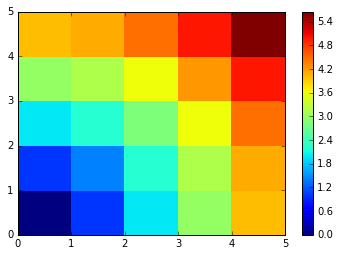

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.pcolor(distance)    
plt.colorbar()    

**Remark** : the `numpy.ogrid` function allows to directly create
vectors x and y of the previous example, with two "significant
dimensions":


In [63]:
x, y = np.ogrid[0:5, 0:5]
x, y

(array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[0, 1, 2, 3, 4]]))

In [64]:
x.shape, y.shape

((5, 1), (1, 5))

In [93]:
distance = np.sqrt(x ** 2 + y ** 2)
print(distance)

[[ 0.          1.          2.          3.          4.        ]
 [ 1.          1.41421356  2.23606798  3.16227766  4.12310563]
 [ 2.          2.23606798  2.82842712  3.60555128  4.47213595]
 [ 3.          3.16227766  3.60555128  4.24264069  5.        ]
 [ 4.          4.12310563  4.47213595  5.          5.65685425]]


## Tip

So, `np.ogrid` is very useful as soon as we have to handle computations
on a grid. On the other hand, `np.mgrid` directly provides matrices full
of indices for cases where we can't (or don't want to) benefit from
broadcasting:


In [66]:
x, y = np.mgrid[0:4, 0:4]
x

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

In [67]:
y

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

## Array shape manipulation

### Flattening

In [96]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [68]:
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [69]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [70]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

Higher dimensions: last dimensions ravel out "first".


### Reshaping

The inverse operation to flattening:


In [71]:
a.shape

(2, 3)

In [72]:
b = a.ravel()
b = b.reshape((2, 3))
b

array([[1, 2, 3],
       [4, 5, 6]])

**Warning**: `ndarray.reshape` **may** return a view (cf `help(np.reshape)`)), or copy

In [73]:
b[0, 0] = 99
a

array([[99,  2,  3],
       [ 4,  5,  6]])

Beware: reshape may also return a copy!:


In [74]:
a = np.zeros((3, 2))
b = a.T.reshape(3*2)
b[0] = 9
a

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

To understand this you need to learn more about the memory layout of a
numpy array.


### Adding a dimension

Indexing with the `np.newaxis` object allows us to add an axis to an
array (you have seen this already above in the broadcasting section):


In [75]:
z = np.array([1, 2, 3])
z

array([1, 2, 3])

In [76]:
z[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [77]:
z[np.newaxis, :]

array([[1, 2, 3]])

### Dimension shuffling

In [78]:
a = np.arange(4*3*2).reshape(4, 3, 2)
a.shape

(4, 3, 2)

In [79]:
a[0, 2, 1]

5

In [80]:
b = a.transpose(1, 2, 0)
b.shape

(3, 2, 4)

In [81]:
b[2, 1, 0]

5

Also creates a view:


In [82]:
b[2, 1, 0] = -1
a[0, 2, 1]

-1

### Resizing

Size of an array can be changed with `ndarray.resize`:


In [83]:
a = np.arange(4)
a.resize((8,))
a

array([0, 1, 2, 3, 0, 0, 0, 0])

However, it must not be referred to somewhere else:


In [101]:
a = np.arange(4)
b = a
# a.resize((16,)) 
# Give error: 
# ValueError: cannot resize an array that references or is referenced
# by another array in this way. 

### Exercise: Shape manipulations

* Look at the docstring for `reshape`, especially the notes section which
has some more information about copies and views.

* Use `flatten` as an alternative to `ravel`. What is the difference?
(Hint: check which one returns a view and which a copy)

* Experiment with `transpose` for dimension shuffling.


## Sorting data

Sorting along an axis:


In [104]:
a = np.array([[4, 3, 5], [1, 2, 1]])
# Sort inplace
a.sort(axis=1)
print("A", a)
# Sort as a result
b = np.sort(a, axis=1)
print("B", b)

A [[3 4 5]
 [1 1 2]]
B [[3 4 5]
 [1 1 2]]


## Note

Sorts each row separately!


Sorting the indexes (with fancy indexing):


In [122]:
a = np.array([4, 3, 1, 2])
j = np.argsort(a)
j

array([2, 3, 1, 0])

In [123]:
# Apply sorted indexes
a[j]
# Equal to a.sort()

array([1, 2, 3, 4])

In [124]:
a.sort()
a

array([1, 2, 3, 4])

Finding minima and maxima:


In [89]:
a = np.array([4, 3, 1, 2])
j_max = np.argmax(a)
j_min = np.argmin(a)
j_max, j_min

(0, 2)

## Exercise: Sorting

* Try both in-place and out-of-place sorting.

* Try creating arrays with different dtypes and sorting them.

* Use `all` or `array_equal` to check the results.

* Look at `np.random.shuffle` for a way to create sortable input quicker.

* Combine `ravel`, `sort` and `reshape`.

* Look at the `axis` keyword for `sort` and rewrite the previous exercise.


## Summary

**What do you need to know to get started?**


* Know how to create arrays : `array`, `arange`, `ones`, `zeros`.

* Know the shape of the array with `array.shape`, then use slicing to
obtain different views of the array: `array[::2]`, etc. Adjust the shape
of the array using `reshape` or flatten it with `ravel`.

* Obtain a subset of the elements of an array and/or modify their values
with masks


In [90]:
a[a < 0] = 0

* Know miscellaneous operations on arrays, such as finding the mean or max
(`array.max()`, `array.mean()`). No need to retain everything, but have
the reflex to search in the documentation (online docs, `help()`,
`lookfor()`)!!

* For advanced use: master the indexing with arrays of integers, as well
as broadcasting. Know more Numpy functions to handle various array
operations.


# End of chapter

In [91]:
%reload_ext version_information
%version_information numpy

Software versions
Python 3.5.0 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 4.0.0
OS Linux 4.1.12 boot2docker x86_64 with debian jessie sid
numpy 1.10.1
Mon Nov 30 10:54:50 2015 UTC